In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
path = '/home/alvaro/Escritorio/FIUBA/Programación/Organizacion de datos'
df= pd.read_csv(path + '/train.csv')
#Fuente: https://es.investing.com/currencies/usd-mxn-historical-data
#AGREGAR EL PATH CORRESPONDIENTE
path1 = '/home/alvaro/Descargas'
dolar= pd.read_csv(path1 + '/Datos históricos USD_MXN.csv')
dolar.columns = ["fecha", "last", "opening", "max", "min", "std"]
dolar.drop(["std", "opening", "opening", "max", "min"], axis=1 ,inplace=True)
#Paso a formato fecha correctamente y luego creo columnas mes y año
dolar['date'] = pd.to_datetime(dolar['fecha'], format="%b %Y")
dolar.drop(["fecha"], axis=1, inplace=True)
dolar.columns= ['price', "date"]
#El csv ponia los numeros con punto en vez de coma.
dolar['price'] = dolar['price'].replace(',', '.', regex=True).astype(float)
dolar["year"] = dolar.date.dt.year
dolar['month'] = dolar.date.dt.month
dolar.drop(["date"], axis=1, inplace=True)
df['fecha'] = pd.to_datetime(df['fecha'])
df['year'] = df['fecha'].dt.year
df['month']= df['fecha'].dt.month
#Agrego la columna precio en dolar por propiedad, en el dataframe original
newDf= pd.merge(df, dolar, on=['year', 'month'], how='left')
newDf["dollar_price"] = newDf.apply(lambda row: row["precio"]/row["price"], axis=1)
#Filtro dejando las cosas útiles.
#Para agregar una columna, se debe agregar aca y luego agregarla al merge
df = newDf.filter(["id", "tipodepropiedad", "habitaciones",'garages', 'banos', 'ciudad',
                   'provincia','metroscubiertos', 'metrostotales', 'idzona', 'fecha',
                   'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
                   'centroscomercialescercanos', 'dollar_price' ])
def asignarMetros(metroscubiertos, metrostotales):
    if (metroscubiertos != 0 and metrostotales == 0):
        return metroscubiertos
    else:
        return metrostotales
    
#Arreglando, no pueden haber propiedades con metros cubiertos pero sin metros totales
df['metrostotales'].fillna(0, inplace=True)
df['metrostotales'] = df.apply(lambda x: asignarMetros(x['metroscubiertos'],x['metrostotales']),axis=1)
df.head()
#Filtrando el garage, lotes, hospedaje, otros
filtroTerreno = df["tipodepropiedad"].isin(["Huerta", "Nave industrial", "Terreno", "Terreno comercial", 
                                            "Bodega comercial", "Terreno industrial"])
dfTerreno = df[filtroTerreno]
dfTerreno.tipodepropiedad.value_counts()
#Dropeo todos los terrenos que tienen habitaciones ya que si las tienen no serian terrenos.
dfTerreno = dfTerreno[dfTerreno["habitaciones"].isna()]
dfTerreno.tipodepropiedad.value_counts()
#Limpiando las propiedades tipo casa, no pueden no tener al menos una habitacion o baño y no pueden
#tener metros no cubiertos
filtro1 = df["tipodepropiedad"].isin(["Apartamento", "Casa", "Casa en condominio",
                                        "Casa uso de suelo", "Rancho", "Quinta Vacacional"])
dfCasas = df[filtro1]
dfCasas = dfCasas[np.isfinite(dfCasas['habitaciones'])]
dfCasas = dfCasas[np.isfinite(dfCasas['banos'])]
dfCasas = dfCasas[np.isfinite(dfCasas['metroscubiertos'])]
dfCasas.garages.fillna(0, inplace=True)
df = pd.merge(dfCasas, dfTerreno, on=['id', 'tipodepropiedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos'
                                      ,'ciudad','provincia','metrostotales','idzona','fecha', 'gimnasio','usosmultiples',
                                       'piscina','escuelascercanas','centroscomercialescercanos', 'dollar_price'], how='outer')


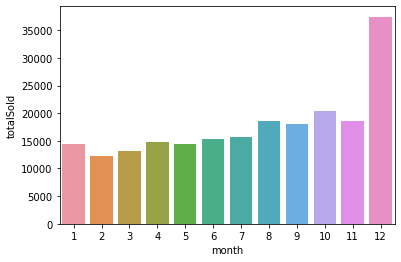

In [3]:
#Arranco 
df["year"] = df.fecha.dt.year
df['month'] = df.fecha.dt.month
grouped = df.groupby('month').agg({'year':'count'})
grouped.reset_index(inplace=True)
grouped.columns = ['month', 'totalSold']
#Cantidad de ventas por mes
sns.barplot(x="month", y='totalSold',data=grouped, linewidth=2.5)

In [4]:
grouped = df.groupby(['month', 'year'])
#grouped.get_group((1,2015))
forPlot = grouped.agg({'year':{'totalSold':'count'}})
#sns.relplot(x="year", col_wrap=5,y='dollar_price',kind='line',
#            data=df,hue='provincia',col='tipodepropiedad',height=3, linewidth=2.5)

forPlot.reset_index(inplace=True)
forPlot

/home/alvaro/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


month  year          
               totalSold
0      1  2012      1428
1      1  2013      1800
2      1  2014      2045
3      1  2015      3894
4      1  2016      5171
5      2  2012      1255
6      2  2013      1280
7      2  2014      2218
8      2  2015      3502
9      2  2016      4069
10     3  2012      1033
11     3  2013      1507
12     3  2014      2604
13     3  2015      3552
14     3  2016      4499
15     4  2012      1337
16     4  2013      1622
17     4  2014      2494
18     4  2015      3416
19     4  2016      5913
20     5  2012      1717
21     5  2013      1785
22     5  2014      2806
23     5  2015      3289
24     5  2016      4762
25     6  2012      1443
26     6  2013      1802
27     6  2014      2715
28     6  2015      3388
29     6  2016      5956
30     7  2012      1814
31     7  2013      2288
32     7  2014      2798
33     7  2015      3449
34     7  2016      5314
35     8  2012      3626
36     8  2013      2148
37     8  2014      3184
38     8  2015      4057
39     8  2016      5623
40     9  2012      2135
41     9  2013      2975
42     9  2014      3483
43     9  2015      4335
44     9  2016      5150
45    10  2012      2661
46    10  2013      3380
47    10  2014      3417
48    10  2015      4942
49    10  2016      5953
50    11  2012      1438
51    11  2013      3582
52    11  2014      3749
53    11  2015      4375
54    11  2016      5408
55    12  2012      1337
56    12  2013      2781
57    12  2014      4103
58    12  2015      3876
59    12  2016     25345

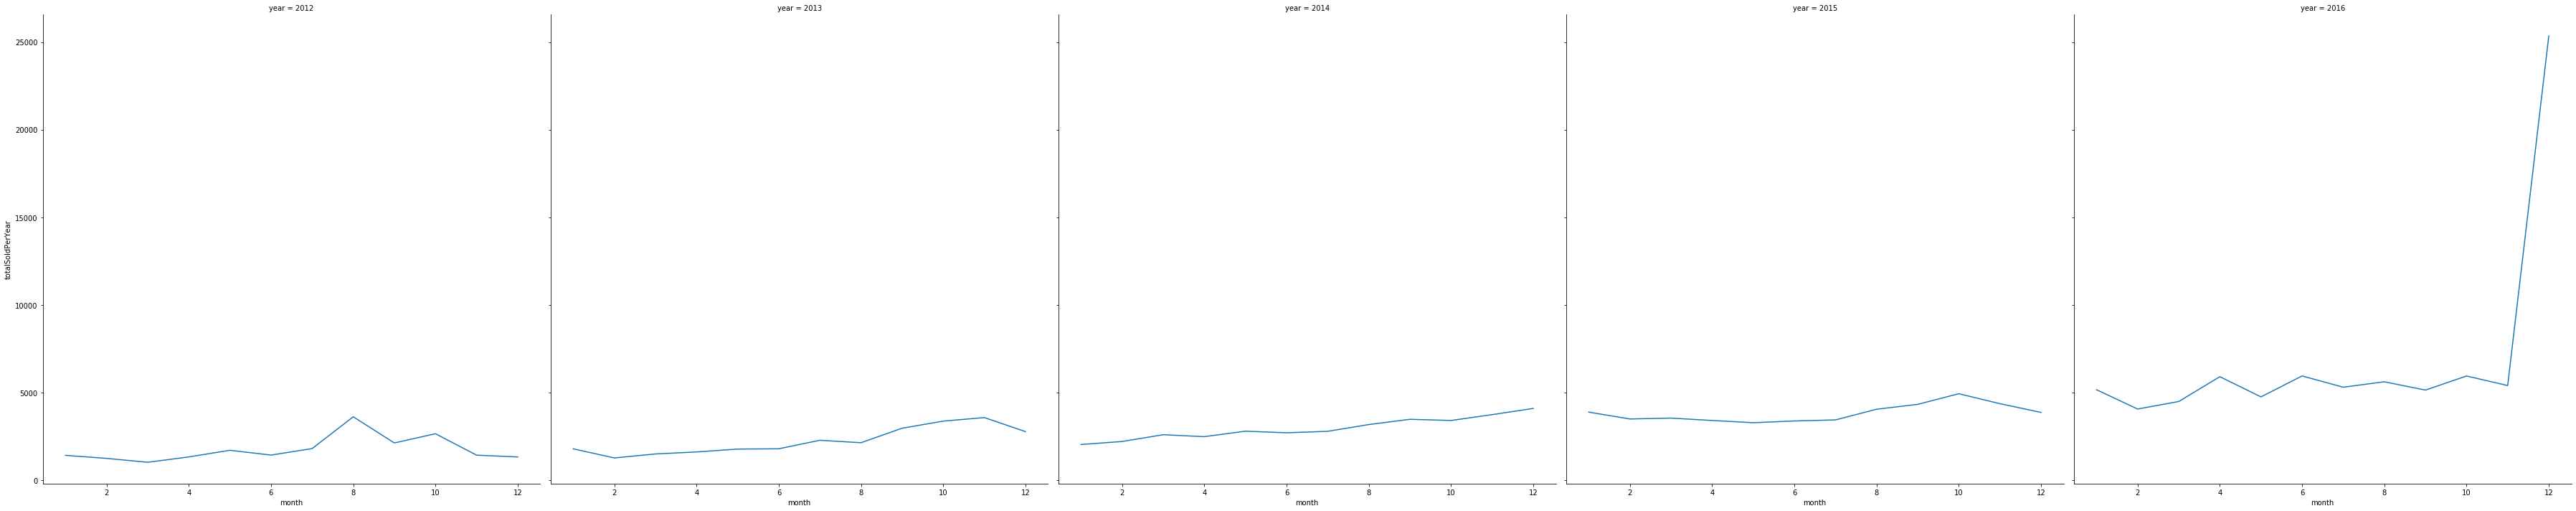

In [5]:
forPlot.columns = ['month', 'year', 'totalSoldPerYear']
sns.relplot(x="month", col_wrap=5,y='totalSoldPerYear',kind='line',
            data=forPlot,col='year',height=10, aspect=1)

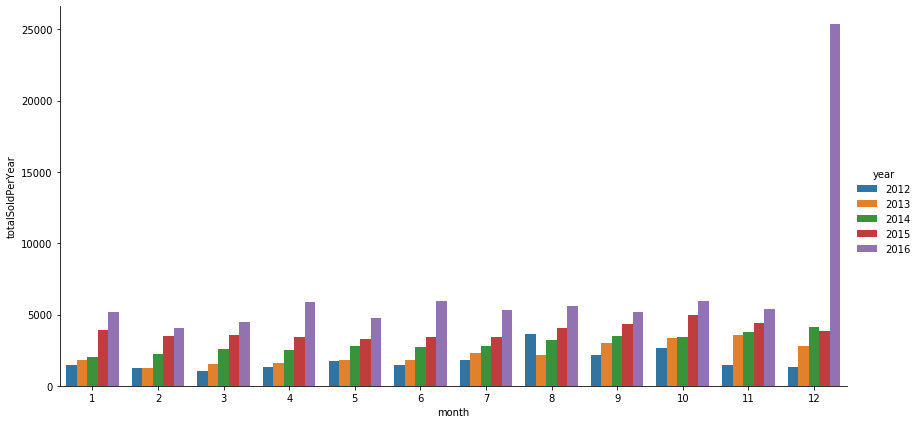

In [6]:
g = sns.catplot(x="month", y="totalSoldPerYear",
                 hue="year",
                 data=forPlot, kind="bar",
                 height=6, aspect=2);

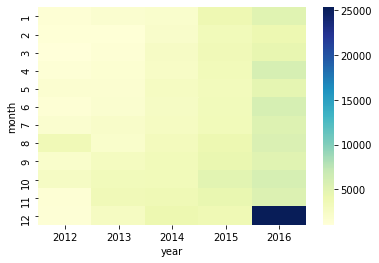

In [7]:
pivot = forPlot.pivot("month", "year", "totalSoldPerYear")
ax = sns.heatmap(pivot, cmap="YlGnBu")